In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

parts_analysis = ["#046d8b", "#0190ba", "#004b60", "#e0576a", "#b42a3d", "#9a303e"]
price_v_socket = ["#b42a3d", "#046d8b", "#b42a3d", "#046d8b", "#046d8b" ]

In [162]:
#load csv GPU_Data.csv
cpu_df = pd.read_csv('PC_Part_Picker_Datasets/CPU_Data.csv')
cpu_df.head()


,Brand,Model,Core Count,Performance Core Clock,Boost Clock,TDP,Integrated Graphics,Sockets Supported,Rating,Rating Count,Price,Release Year,Socket Type
0,AMD,Ryzen 7 7800X3D,8,4.2 GHz,5 GHz,120 W,Radeon,Yes,5,208,369.00,2022.0,AM5
1,AMD,Ryzen 5 7600X,6,4.7 GHz,5.3 GHz,105 W,Radeon,Yes,5,113,218.46,2022.0,AM5
2,AMD,Ryzen 5 5600X,6,3.7 GHz,4.6 GHz,65 W,NaN,Yes,5,609,151.24,2021.0,AM4
3,Intel,Core i9-14900K,24,3.2 GHz,6 GHz,125 W,Intel UHD Graphics 770,Yes,5,13,544.99,2023.0,LGA 1700
4,AMD,Ryzen 5 7600,6,3.8 GHz,5.1 GHz,65 W,Radeon,Yes,5,65,260.73,2022.0,AM5


In [163]:
gpu_df = pd.read_csv('PC_Part_Picker_Datasets/GPU_Data.csv')
gpu_df.head()

,Name,Chipset,Memory,Core Clock,Boost Clock,Length,Rating,Rating Count,Price
0,MSI GeForce RTX 3060 Ventus 2X 12G,GeForce RTX 3060 12GB,12.0,1320 MHz,1777 MHz,235 mm,5,26,309.99
1,Gigabyte WINDFORCE OC,GeForce RTX 4070,12.0,1920 MHz,2490 MHz,261 mm,5,18,549.99
2,Asus DUAL OC,GeForce RTX 4060,8.0,1830 MHz,2535 MHz,227 mm,5,4,304.99
3,Asus ROG STRIX GAMING OC,GeForce RTX 4090,24.0,2235 MHz,2640 MHz,358 mm,5,8,2423.90
4,PNY VCNRTX6000ADA-PB,RTX 6000 Ada Generation,48.0,915 MHz,2505 MHz,267 mm,0,0,9999.00


In [164]:
mb_df = pd.read_csv('PC_Part_Picker_Datasets/MB_Data.csv')
mb_df.head()

,Name,Socket,Form Factor,Max Memory,Memory Slots,Rating,Rating Count,Price
0,Asus ROG STRIX B650-A GAMING WIFI,AM5,ATX,192 GB,4,5,23,259.99
1,MSI B650 GAMING PLUS WIFI,AM5,ATX,192 GB,4,5,6,159.99
2,MSI B760 GAMING PLUS WIFI,LGA1700,ATX,192 GB,4,5,4,159.99
3,MSI B550 GAMING GEN3,AM4,ATX,128 GB,4,4,3,99.99
4,MSI PRO Z790-A MAX WIFI,LGA1700,ATX,192 GB,4,5,4,239.99


In [165]:
memory_df = pd.read_csv('PC_Part_Picker_Datasets/Memory_Data.csv')
memory_df.head()

,Name,Speed,Modules,Price/GB,First Word Latency,CAS Latency,Rating,Rating Count,Price
0,Corsair Vengeance LPX 16 GB,DDR4-3200,2 x 8GB,$2.562,10 ns,16,5,483,40.99
1,Corsair Vengeance 32 GB,DDR5-5600,2 x 16GB,$3.625,12.857 ns,36,5,57,115.99
2,G.Skill Trident Z5 RGB 32 GB,DDR5-6000,2 x 16GB,$3.687,12 ns,36,5,39,117.99
3,Corsair Vengeance RGB Pro 32 GB,DDR4-3600,2 x 16GB,$3.062,10 ns,18,5,85,97.99
4,G.Skill Trident Z5 RGB 64 GB,DDR5-6400,2 x 32GB,$3.406,10 ns,32,5,13,217.99


In [166]:
power_df = pd.read_csv('PC_Part_Picker_Datasets/Power_Data.csv')
power_df.head()

,Name,Type,Efficiency,Wattage,Modular,Rating,Rating Count,Price,Efficiency Rating
0,Corsair RM750e,ATX,Rating80+ Gold,750,Full,5,69,99.99,3
1,Corsair RM850e,ATX,Rating80+ Gold,850,Full,5,42,119.99,3
2,Corsair RM1000e,ATX,Rating80+ Gold,1000,Full,5,26,179.99,3
3,Corsair RM850x,ATX,Rating80+ Gold,850,Full,5,174,134.99,3
4,Corsair CX650M,ATX,Rating80+ Bronze,650,Semi,5,16,69.98,1


In [167]:
storage_df = pd.read_csv('PC_Part_Picker_Datasets/Storage_Data.csv')
storage_df.head()

,Name,Capacity,Price/GB,Type,Form Factor,Interface,Rating,Rating Count,Price
0,Samsung 980 Pro,2 TB,$166.99,SSD,M.2-2280,M.2 PCIe 4.0 X4,5,244,166.99
1,Samsung 970 Evo Plus,1 TB,$94.99,SSD,M.2-2280,M.2 PCIe 3.0 X4,5,451,94.99
2,Kingston NV2,1 TB,$60.99,SSD,M.2-2280,M.2 PCIe 4.0 X4,5,63,60.99
3,Samsung 980 Pro,1 TB,$105.39,SSD,M.2-2280,M.2 PCIe 4.0 X4,5,286,105.39
4,Samsung 990 Pro,4 TB,$339.99,SSD,M.2-2280,M.2 PCIe 4.0 X4,5,11,339.99


In [168]:
print(cpu_df.dtypes)


Brand                      object
Model                      object
Core Count                  int64
Performance Core Clock     object
Boost Clock                object
TDP                        object
Integrated Graphics        object
Sockets Supported          object
Rating                      int64
Rating Count                int64
Price                     float64
Release Year              float64
Socket Type                object
dtype: object


In [169]:
#make release year datetime
cpu_df['Release Year'] = pd.to_datetime(cpu_df['Release Year'], format='%Y')
cpu_df['Release Year'] = cpu_df['Release Year'].dt.year


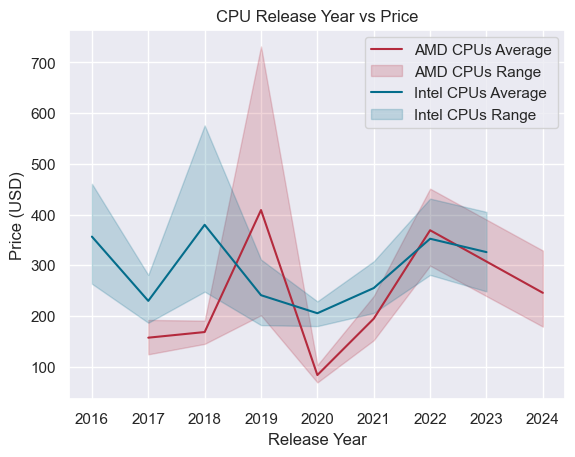

In [170]:
amd_cpu_df = cpu_df[cpu_df['Brand'] == 'AMD']
intel_cpu_df = cpu_df[cpu_df['Brand'] == 'Intel']
#theme for seaborn
sns.set_theme(style='darkgrid')
sns.set_theme(style='darkgrid')
sns.lineplot(data=amd_cpu_df, x='Release Year', y='Price', color='#b42a3d')
sns.lineplot(data=intel_cpu_df, x='Release Year', y='Price', color='#046d8b')
plt.xlabel('Release Year')
plt.ylabel('Price (USD)')
plt.title('CPU Release Year vs Price')
plt.legend(['AMD CPUs Average', 'AMD CPUs Range', 'Intel CPUs Average', 'Intel CPUs Range'])
plt.savefig('Visualizations/AMD_vs_Intel_line.png')
plt.show()


#save as png
#save in visualizations folder


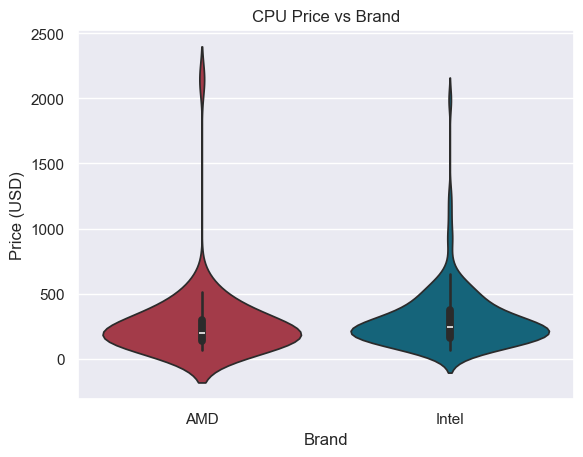

In [171]:
#Create a violin plot of CPU Price vs Brand using seaborn
sns.violinplot(data=cpu_df, x='Brand', y='Price',hue = 'Brand', palette={'AMD': '#b42a3d', 'Intel': '#046d8b'})
plt.xlabel('Brand')
plt.ylabel('Price (USD)')
plt.title('CPU Price vs Brand')
#save as png
plt.savefig('Visualizations/CPU_price_vs_brand_vio.png')
plt.show()





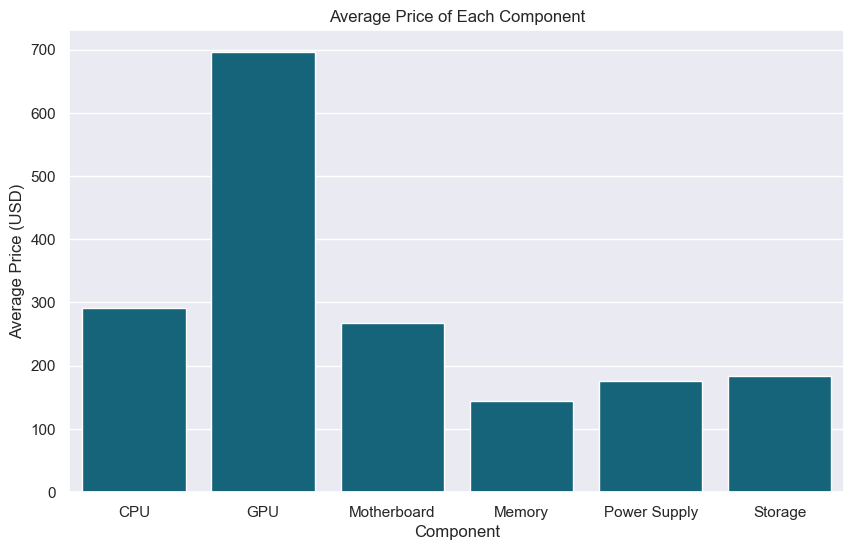

In [172]:
#create a bar chart of the average price of each component
avg_price = [cpu_df['Price'].mean(), gpu_df['Price'].mean(), mb_df['Price'].mean(), memory_df['Price'].mean(), power_df['Price'].mean(), storage_df['Price'].mean()]
components = ['CPU', 'GPU', 'Motherboard', 'Memory', 'Power Supply', 'Storage']
plt.figure(figsize=(10, 6))
sns.barplot(x=components, y=avg_price, color='#046d8b')
plt.xlabel('Component')
plt.ylabel('Average Price (USD)')
plt.title('Average Price of Each Component')
#save as png
plt.savefig('Visualizations/avg_price_histo.png')
plt.show()



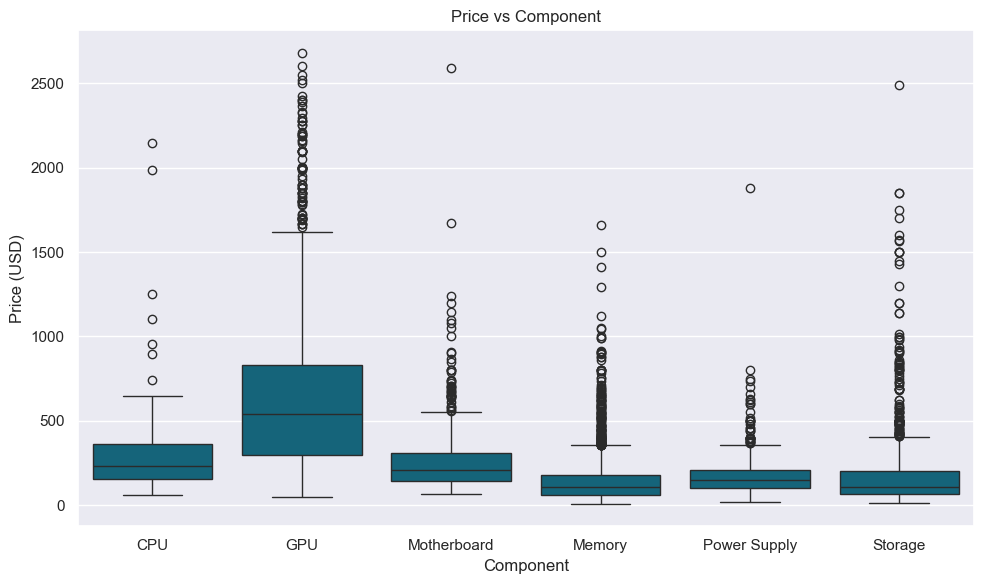

In [173]:
#combine the dataframes for all components into one dataframe
#add a column for component type
cpu_df['Component'] = 'CPU'
gpu_df['Component'] = 'GPU'
mb_df['Component'] = 'Motherboard'
memory_df['Component'] = 'Memory'
power_df['Component'] = 'Power Supply'
storage_df['Component'] = 'Storage'
all_df = pd.concat([cpu_df, gpu_df, mb_df, memory_df, power_df, storage_df])
#remove outlier value > 3000
all_df = all_df[all_df['Price'] < 3000]

#Create a boxplot of price vs component using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Component', y='Price',color = '#046d8b', data=all_df)
plt.xlabel('Component')
plt.ylabel('Price (USD)')
plt.title('Price vs Component')
plt.tight_layout()
#save as png
plt.savefig('Visualizations/price_vs_component_boxplot.png')
plt.show()




In [174]:
#change boost clock to numeric
cpu_df['Boost Clock'] = cpu_df['Boost Clock'].str.replace('GHz', '')
cpu_df['Boost Clock'] = pd.to_numeric(cpu_df['Boost Clock'])
cpu_df['Performance Core Clock'] = cpu_df['Performance Core Clock'].str.replace('GHz', '')
cpu_df['Performance Core Clock'] = pd.to_numeric(cpu_df['Performance Core Clock'])


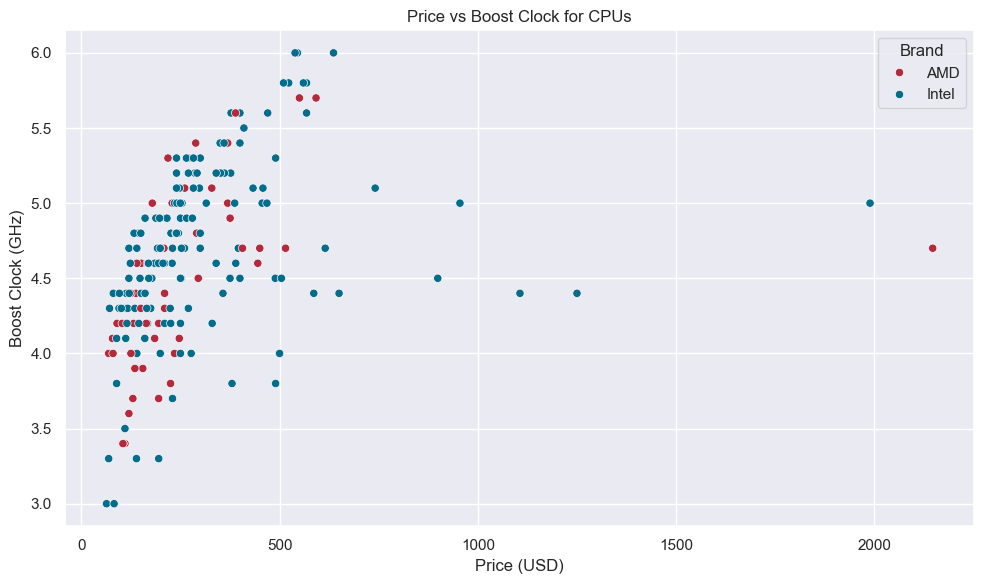

Brand                                 Intel
Model                     Core i9-14900KF  
Core Count                               24
Performance Core Clock                  3.2
Boost Clock                             6.0
TDP                                   125 W
Integrated Graphics                     NaN
Sockets Supported                       Yes
Rating                                    5
Rating Count                              3
Price                                 539.0
Release Year                           2023
Socket Type                        LGA 1700
Component                               CPU
Name: 38, dtype: object


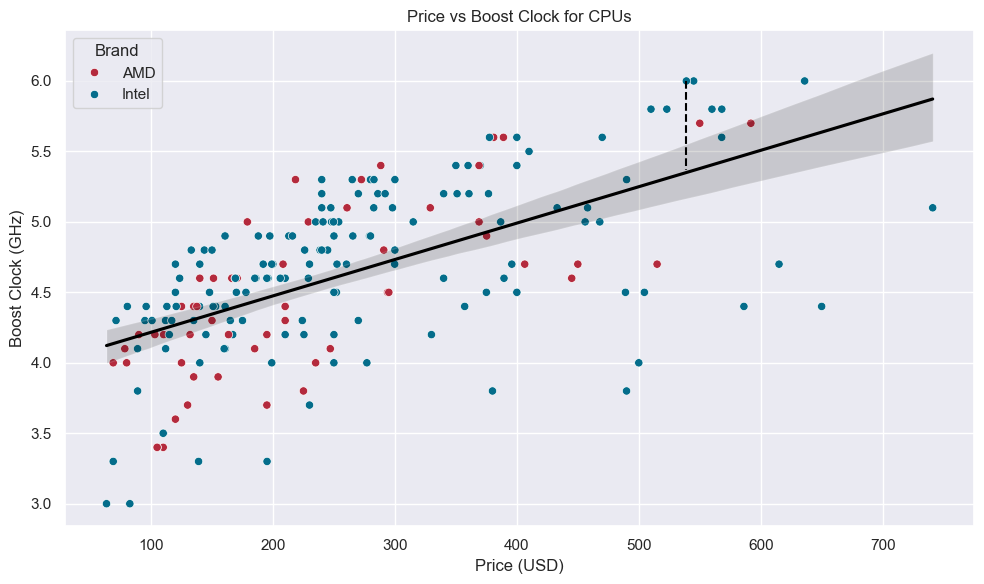

In [175]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Boost Clock', hue='Brand', palette={'AMD': '#b42a3d', 'Intel': '#046d8b'}, data=cpu_df)
plt.xlabel('Price (USD)')
plt.ylabel('Boost Clock (GHz)')
plt.title('Price vs Boost Clock for CPUs')
plt.tight_layout()

# Save as png
plt.savefig('Visualizations/price_vs_boost_scatter.png')
plt.show()

#remove outliers on price above 750, call it cpu_df_no_outliers recreate scatter plot with new data and put a regression line
cpu_df_no_outliers = cpu_df[cpu_df['Price'] < 750]


#give the data index to the point with the highest positive and negative residuals from the regression line
residuals = cpu_df_no_outliers['Boost Clock'] - (0.0005 * cpu_df_no_outliers['Price'] + 3.5)
max_residual = residuals.idxmax()
min_residual = residuals.idxmin()
print(cpu_df_no_outliers.iloc[max_residual])


#do the above but have the lines start at max_residual and min_residual points and end at the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Boost Clock', hue='Brand', palette={'AMD': '#b42a3d', 'Intel': '#046d8b'}, data=cpu_df_no_outliers)
sns.regplot(x='Price', y='Boost Clock', data=cpu_df_no_outliers, scatter=False, color='black')
plt.plot([cpu_df_no_outliers.iloc[max_residual]['Price'], cpu_df_no_outliers.iloc[max_residual]['Price']], [cpu_df_no_outliers.iloc[max_residual]['Boost Clock'], 0.0005 * cpu_df_no_outliers.iloc[max_residual]['Price'] + 5.1], color='black', linestyle='--')
plt.xlabel('Price (USD)')
plt.ylabel('Boost Clock (GHz)')
plt.title('Price vs Boost Clock for CPUs')
plt.tight_layout()
# Save as png
plt.savefig('Visualizations/price_vs_boost_scatter_no_outliers_color_lines_points.png')
plt.show()









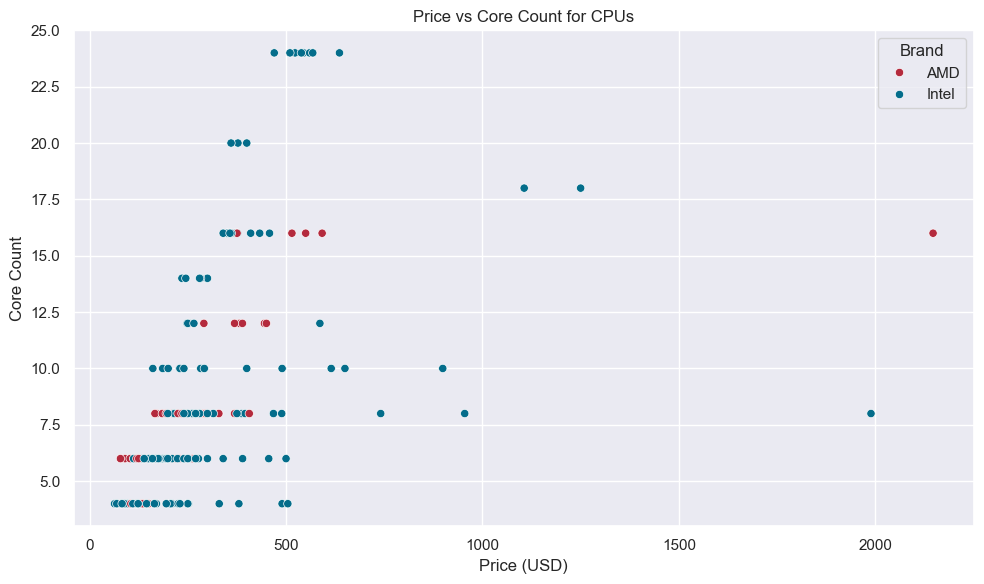

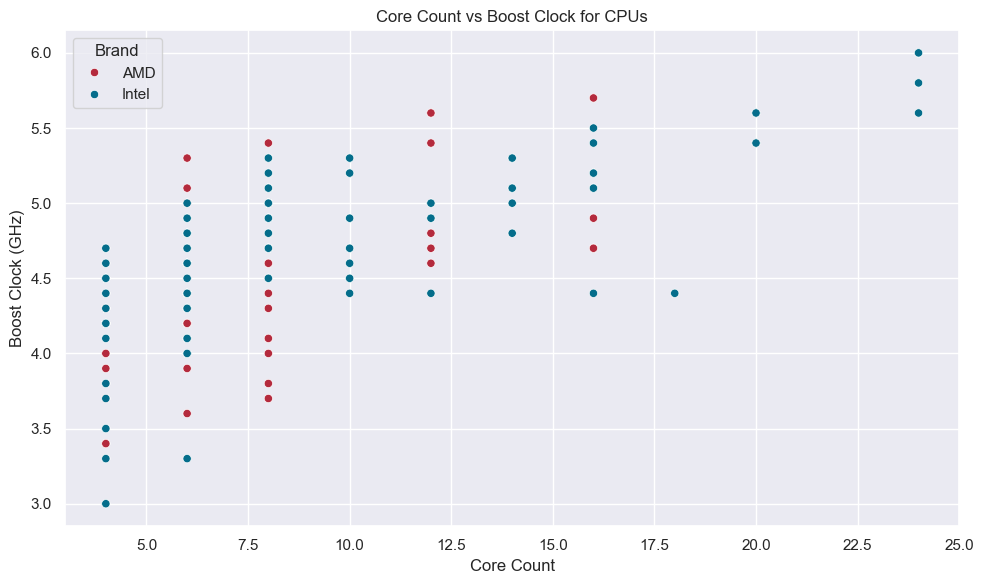

In [176]:
#Scatter plot of Price vs Core Count for CPUs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Core Count', hue='Brand', palette={'AMD': '#b42a3d', 'Intel': '#046d8b'}, data=cpu_df)
plt.xlabel('Price (USD)')
plt.ylabel('Core Count')
plt.title('Price vs Core Count for CPUs')
plt.tight_layout()
# Save as png
#plt.savefig('Visualizations/price_vs_core_scatter.png')
plt.show()

#Scatter plot of Core Count vs Boost Clock for CPUs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Core Count', y='Boost Clock', hue='Brand', palette={'AMD': '#b42a3d', 'Intel': '#046d8b'}, data=cpu_df)
plt.xlabel('Core Count')
plt.ylabel('Boost Clock (GHz)')
plt.title('Core Count vs Boost Clock for CPUs')
plt.tight_layout()
# Save as png
#plt.savefig('Visualizations/core_vs_boost_scatter.png')
plt.show()



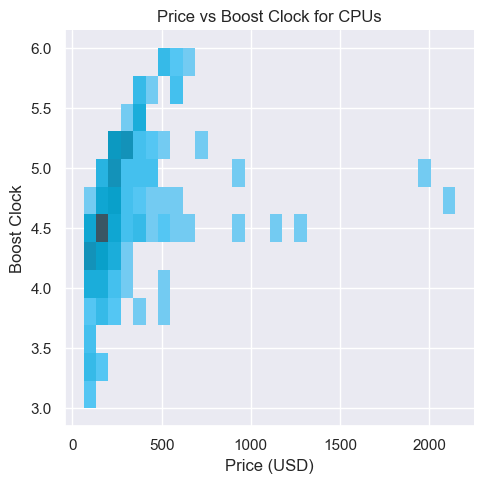

In [177]:
sns.displot(data=cpu_df, x='Price', y='Boost Clock', color='#046d8b')
plt.xlabel('Price (USD)')
plt.ylabel('Boost Clock')
plt.title('Price vs Boost Clock for CPUs')
plt.tight_layout() 
plt.savefig('Visualizations/price_vs_boost_displot.png')
plt.show()



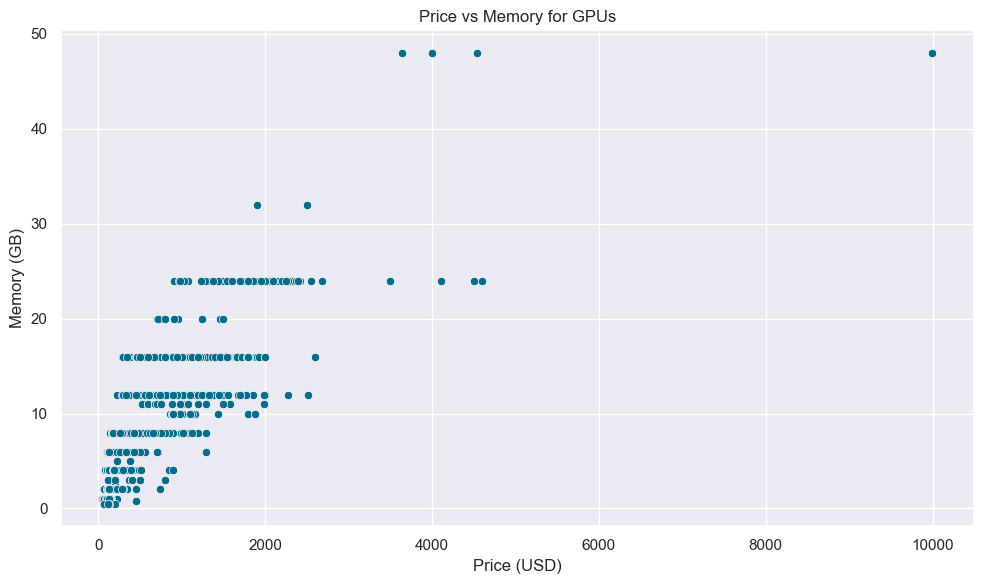

In [178]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Memory', data=gpu_df, color='#046d8b')
plt.xlabel('Price (USD)')
plt.ylabel('Memory (GB)')
plt.title('Price vs Memory for GPUs')
plt.tight_layout()
#save as png
plt.savefig('Visualizations/price_vs_memory_scatter.png')

plt.show()



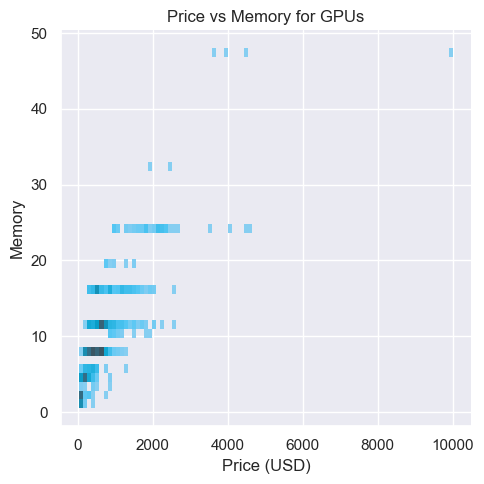

In [179]:
sns.displot(data = gpu_df, x = 'Price', y = 'Memory', color = '#046d8b')
plt.xlabel('Price (USD)')
plt.ylabel('Memory')
plt.title('Price vs Memory for GPUs')
plt.tight_layout()
#save as png
plt.savefig('Visualizations/price_vs_memory_displot.png')
plt.show()




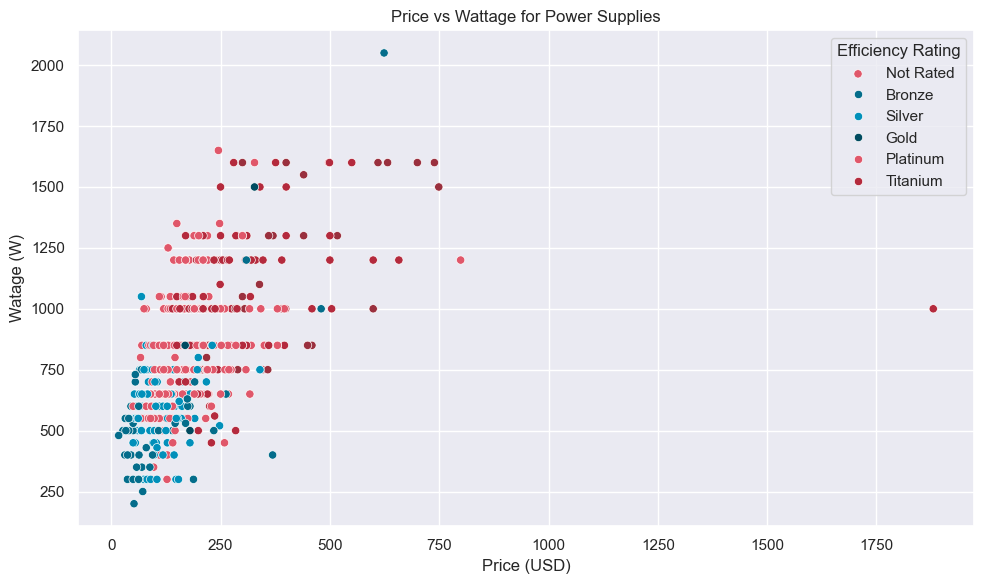

In [180]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Wattage',hue = 'Efficiency Rating', palette= parts_analysis, data=power_df)
plt.xlabel('Price (USD)')
plt.ylabel('Watage (W)')
plt.title('Price vs Wattage for Power Supplies')
plt.legend(title='Efficiency Rating', loc='upper right', labels=['Not Rated','Bronze', 'Silver', 'Gold', 'Platinum', 'Titanium'])
plt.tight_layout()
#save as png
plt.savefig('Visualizations/price_vs_wattage_scatter.png')
plt.show()




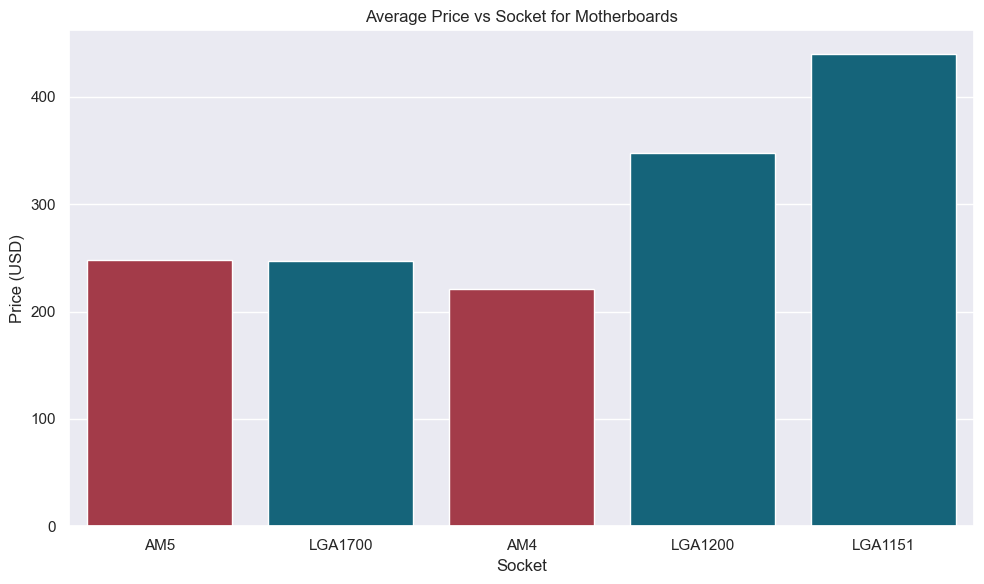

In [181]:
#create chart for types of sockets and average price
plt.figure(figsize=(10, 6))
sns.barplot(x='Socket', y='Price', data=mb_df, errorbar=None,hue = 'Socket', palette = price_v_socket) #ci=None removes error bars
plt.xlabel('Socket')
plt.ylabel('Price (USD)')
plt.title('Average Price vs Socket for Motherboards')
plt.tight_layout()
#save as png
plt.savefig('Visualizations/price_vs_socket_bar.png')
plt.show()



In [182]:
cpu_usage = pd.read_csv('PC_Part_Picker_Datasets/cpu_usage_steam.csv')
#remove 'cpu' from the cpu column
cpu_usage['PHYSICAL CPUS (WINDOWS)'] = cpu_usage['PHYSICAL CPUS (WINDOWS)'].str.replace('cpus', '')
cpu_usage['PHYSICAL CPUS (WINDOWS)'] = cpu_usage['PHYSICAL CPUS (WINDOWS)'].str.replace('cpu', '')
#remove % from every column
cpu_usage = cpu_usage.replace('%', '', regex=True)
#put 0 in cells with only - in them
cpu_usage = cpu_usage.replace('-', '0')
#make all columns numeric besides the last one numeric
cpu_usage = cpu_usage.apply(pd.to_numeric, errors='ignore')
cpu_usage.head()



,PHYSICAL CPUS (WINDOWS),OCT,NOV,DEC,JAN,FEB,% Change
0,1,0.07,0.08,0.08,0.07,0.06,-0.01
1,2,5.01,6.35,6.48,6.16,5.44,-0.72
2,3,0.25,0.30,0.29,0.28,0.27,-0.01
3,4,18.44,22.49,22.33,21.98,19.94,-2.04
4,5,0.02,0.03,0.03,0.03,0.03,0.00


In [183]:
GPU_usage = pd.read_csv('PC_Part_Picker_Datasets/gpu_usage_steam.csv')
#remove % from every column
GPU_usage = GPU_usage.replace('%', '', regex=True)
#put 0 in cells with only - in them
GPU_usage = GPU_usage.replace('-', '0')
#make all columns numeric besides the last one numeric
GPU_usage = GPU_usage.apply(pd.to_numeric, errors='ignore')
#split the first column into two columns by removing the first word and putting it in a new column the first word column is the Brand and the rest is the model
GPU_usage['Brand'] = GPU_usage['DIRECTX 12 GPUS'].str.split(' ').str[0]
GPU_usage['Model'] = GPU_usage['DIRECTX 12 GPUS'].str.split(' ').str[1:]
GPU_usage['Model'] = GPU_usage['Model'].str.join(' ')
#remove the old GPU column
GPU_usage = GPU_usage.drop(columns='DIRECTX 12 GPUS')
#reorder the columns
GPU_usage = GPU_usage[['Brand', 'Model', 'MAR','APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB']]
GPU_usage.head()
#GPU_usage.dtypes

,Brand,Model,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB
0,NVIDIA,GeForce RTX 3060,11.05,4.97,5.24,5.10,5.32,5.32,6.86,10.17,5.23,5.53,5.19,6.39
1,NVIDIA,GeForce GTX 1650,4.20,6.58,6.47,6.10,5.77,5.58,5.23,3.72,4.93,4.90,4.87,4.38
2,NVIDIA,GeForce RTX 2060,8.35,4.75,4.84,4.48,4.48,4.30,5.13,6.22,3.86,3.87,3.66,4.27
3,NVIDIA,GeForce GTX 1060,8.14,5.33,5.30,4.94,5.02,4.72,5.14,5.23,4.49,4.06,3.85,4.06
4,NVIDIA,GeForce RTX 3070,5.62,3.14,3.26,3.21,3.55,3.50,3.96,5.31,3.34,3.49,3.26,3.99


In [184]:
#create a new dataframe from the GPU_usage dataframe drops the Model and % Change columns
GPU_usage_no_model = GPU_usage.drop(columns=['Model'])
#For each unique Brand sum the usage for each month
GPU_usage_no_model = GPU_usage_no_model.groupby('Brand').sum()
#reset the index
GPU_usage_no_model 

,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB
Brand,,,,,,,,,,,,
AMD,4.74,8.65,8.64,8.82,9.71,9.63,9.01,5.98,9.76,9.97,10.15,9.30
Intel,0.33,1.69,1.37,1.31,1.48,1.33,1.17,2.19,2.98,3.06,3.13,2.82
NVIDIA,82.39,74.15,74.66,75.09,73.32,74.92,77.02,79.63,72.54,72.33,72.41,75.10
Other,12.55,15.53,14.97,14.41,14.83,13.80,12.80,12.19,13.39,13.27,12.75,12.78


In [185]:
GPU_usage_2 = pd.DataFrame({'Nvidia': [82.39, 74.15, 74.66, 75.09, 73.32, 74.92, 77.02, 79.63, 72.54, 72.33, 72.41, 75.10],
                          'Other': [12.55, 15.53, 14.97, 14.41, 14.83, 13.80, 12.80, 12.19, 13.39, 13.27, 12.75, 12.78],
                          'AMD': [4.74, 8.65, 8.64, 8.82, 9.71, 9.63, 9.01, 5.98, 9.76, 9.97, 10.15, 9.30],
                          'Intel': [0.33, 1.69, 1.37, 1.31, 1.48, 1.33, 1.17, 2.19, 2.98, 3.06, 3.13, 2.82],},
                          index=['MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB'])



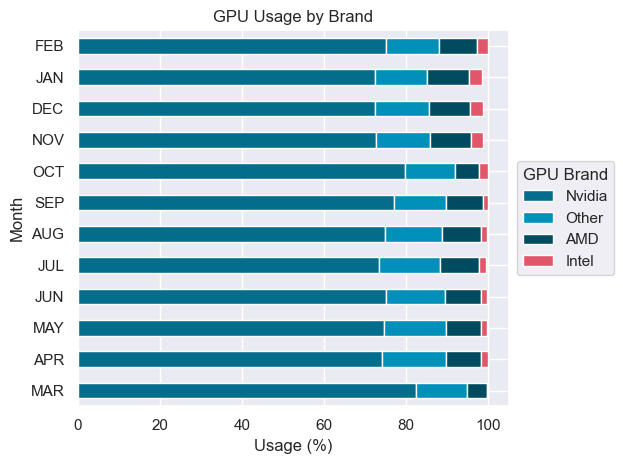

In [186]:
GPU_usage_2.plot(kind='barh', stacked=True, color=parts_analysis)
plt.xlabel('Usage (%)')
plt.ylabel('Month')
plt.legend(title='GPU Brand', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('GPU Usage by Brand')
plt.tight_layout()
#save as png
plt.savefig('Visualizations/GPU_usage_by_brand_bar.png')
plt.show()


In [187]:
AMD_cpu_speeds = pd.read_csv('PC_Part_Picker_Datasets/AMD_CPU_Speeds.csv')
#remove % from every column
AMD_cpu_speeds = AMD_cpu_speeds.replace('%', '', regex=True)
#put 0 in cells with only - in them
AMD_cpu_speeds = AMD_cpu_speeds.replace('-', '0')
#make all columns numeric besides the last one numeric
AMD_cpu_speeds = AMD_cpu_speeds.apply(pd.to_numeric, errors='ignore')
AMD_cpu_speeds.head()

,AMD CPU SPEEDS (WINDOWS),OCT,NOV,DEC,JAN,FEB,% Change
0,2.3 Ghz to 2.69 Ghz,10.33,13.01,12.93,12.93,12.39,-0.54
1,3.3 Ghz to 3.69 Ghz,7.36,10.00,10.19,10.45,9.89,-0.56
2,2.7 Ghz to 2.99 Ghz,4.30,6.09,5.74,6.05,5.47,-0.58
3,3.0 Ghz to 3.29 Ghz,1.23,1.68,1.65,1.66,1.50,-0.16
4,2.0 Ghz to 2.29 Ghz,1.20,1.55,1.56,1.54,1.35,-0.19


In [188]:
Intel_cpu_speeds = pd.read_csv('PC_Part_Picker_Datasets/intel_cpu_speeds.csv')
#remove % from every column
Intel_cpu_speeds = Intel_cpu_speeds.replace('%', '', regex=True)
#put 0 in cells with only - in them
Intel_cpu_speeds = Intel_cpu_speeds.replace('-', '0')
#make all columns numeric besides the last one numeric
Intel_cpu_speeds = Intel_cpu_speeds.apply(pd.to_numeric, errors='ignore')
Intel_cpu_speeds.head()



,INTEL CPU SPEEDS (WINDOWS),OCT,NOV,DEC,JAN,FEB,% Change
0,2.3 Ghz to 2.69 Ghz,22.99,21.72,21.60,22.01,22.85,0.84
1,3.3 Ghz to 3.69 Ghz,13.20,15.11,15.07,15.14,14.65,-0.49
2,2.7 Ghz to 2.99 Ghz,20.52,12.39,12.59,12.11,14.24,2.13
3,3.0 Ghz to 3.29 Ghz,6.81,6.62,6.57,6.56,6.43,-0.13
4,2.0 Ghz to 2.29 Ghz,5.70,4.35,4.51,4.14,4.40,0.26


In [189]:
#pull out OCT NOV DEC JAN and FEB columns from Intel_cpu_speeds and AMD_cpu_speeds and make them into two new dataframes
Intel_cpu_speeds_2 = Intel_cpu_speeds[['OCT', 'NOV', 'DEC', 'JAN', 'FEB']]
AMD_cpu_speeds_2 = AMD_cpu_speeds[['OCT', 'NOV', 'DEC', 'JAN', 'FEB']]

#add these two dataframes together to get a dataframe with all the data
CPU_speeds = Intel_cpu_speeds_2 + AMD_cpu_speeds_2
#add the INTEL CPU SPEEDS (WINDOWS) column to the new dataframe
CPU_speeds['INTEL CPU SPEEDS (WINDOWS)'] = Intel_cpu_speeds['INTEL CPU SPEEDS (WINDOWS)']
#push this column to the front of the dataframe
CPU_speeds = CPU_speeds[['INTEL CPU SPEEDS (WINDOWS)', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB']]
#rename the colum 'CPU SPEEDS (WINDOWS)' 
CPU_speeds = CPU_speeds.rename(columns={'INTEL CPU SPEEDS (WINDOWS)': 'CPU SPEEDS (WINDOWS)'})
CPU_speeds 


,CPU SPEEDS (WINDOWS),OCT,NOV,DEC,JAN,FEB
0,2.3 Ghz to 2.69 Ghz,33.32,34.73,34.53,34.94,35.24
1,3.3 Ghz to 3.69 Ghz,20.56,25.11,25.26,25.59,24.54
2,2.7 Ghz to 2.99 Ghz,24.82,18.48,18.33,18.16,19.71
3,3.0 Ghz to 3.29 Ghz,8.04,8.30,8.22,8.22,7.93
4,2.0 Ghz to 2.29 Ghz,6.90,5.90,6.07,5.68,5.75
5,3.7 Ghz and above,3.55,3.84,3.81,3.73,3.55
6,1.7 Ghz to 1.99 Ghz,1.56,2.04,2.10,2.06,1.85
7,Below 1.4 Ghz,0.80,1.04,1.10,1.04,0.94
8,1.5 Ghz to 1.69 Ghz,0.22,0.28,0.29,0.28,0.25
9,1.4 Ghz to 1.49 Ghz,0.19,0.26,0.25,0.25,0.21


In [190]:
CPU_speeds_2 = pd.DataFrame({'2.3 Ghz to 2.69 Ghz': [33.32, 34.73, 34.53, 34.94, 35.24],
                         '3.3 Ghz to 3.69 Ghz': [20.56,25.11, 25.26, 25.59, 24.54],
                          '2.7 Ghz to 2.99 Ghz': [24.82,18.48, 18.33, 18.16, 19.71],
                          '3.0 Ghz to 3.29 Ghz' : [8.04, 8.30, 8.22, 8.22, 7.93],
                          '2.0 Ghz to 2.29 Ghz' : [6.90, 5.90, 6.07, 5.68, 5.75],
                          '3.7 Ghz and above' : [3.55, 3.84, 3.81, 3.73, 3.55],
                          '1.7 Ghz to 1.99 Ghz' : [1.56, 2.04, 2.10, 2.06, 1.85],
                          'Below 1.4 Ghz' : [0.80, 1.04, 1.10, 1.04, 0.94],
                          '1.5 Ghz to 1.69 Ghz' : [0.22, 0.28, 0.29, 0.28, 0.25],
                          '1.4 Ghz to 1.49 Ghz' : [0.19, 0.26, 0.25, 0.25, 0.21]},
                        index=['OCT', 'NOV', 'DEC', 'JAN', 'FEB'])

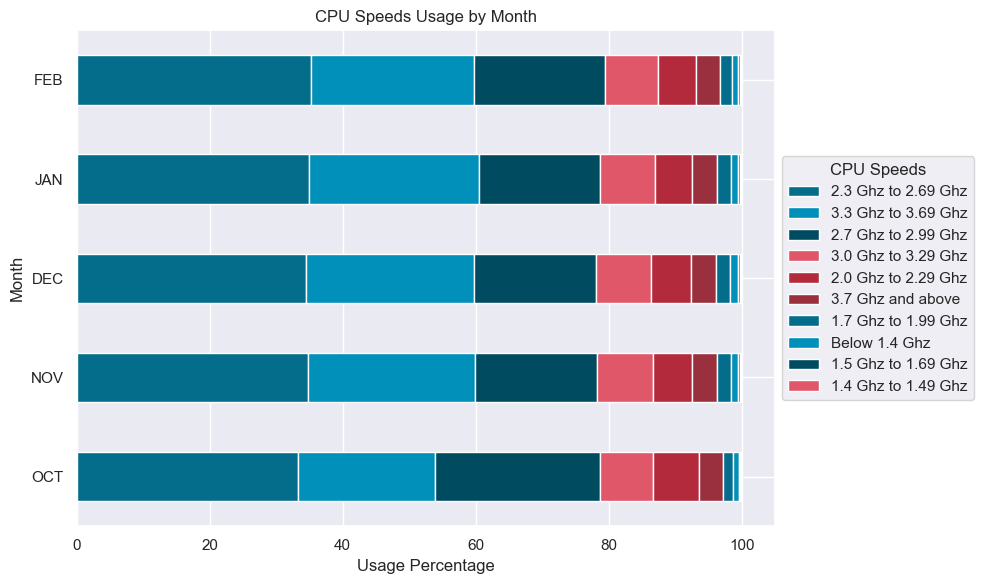

In [192]:
#Creating a stacked bar chart of CPU speeds by month
CPU_speeds_2.plot(kind='barh', stacked=True, color=parts_analysis, figsize=(10, 6))
plt.xlabel('Usage Percentage')
plt.ylabel('Month')
plt.title('CPU Speeds Usage by Month')
plt.legend(title='CPU Speeds', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
#save as png
plt.savefig('Visualizations/cpu_speeds_bar.png')
plt.show()

